<a href="https://colab.research.google.com/github/MadmanMarble/MadmanMarble/blob/main/Clipping%20Raster%20In%20R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Clip Raster in R
#### https://www.earthdatascience.org/courses/earth-analytics/lidar-raster-data-r/crop-raster-data-in-r/

In [2]:
# load the raster and rgdal libraries

install.packages("raster")
install.packages("rgdal")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘sp’, ‘Rcpp’, ‘terra’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘rgdal’ is not available for this version of R

A version of this package for your version of R might be available elsewhere,
see the ideas at
https://cran.r-project.org/doc/manuals/r-patched/R-admin.html#Installing-packages”


In [3]:
install.packages("googledrive")
# install.packages('sf')
# install.packages('exactextractr')
# install.packages("DBI")
# install.packages("RSQLite")
# install.packages("RPostgreSQL")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [9]:
library(ggplot2)
# library(sf)
library(magrittr)
library(data.table)
library(raster)
# library(exactextractr)
library(googledrive)
library(DBI)
library(zip)


Attaching package: ‘zip’


The following objects are masked from ‘package:utils’:

    unzip, zip




In [10]:
drive_auth(use_oob = TRUE, cache = FALSE)

Please point your browser to the following url: 

https://accounts.google.com/o/oauth2/v2/auth?client_id=603366585132-frjlouoa3s2ono25d2l9ukvhlsrlnr7k.apps.googleusercontent.com&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email&redirect_uri=https%3A%2F%2Fwww.tidyverse.org%2Fgoogle-callback%2F&response_type=code&state=8fb6097b2a7041f67e9ea3874551870b&access_type=offline&prompt=consent



Enter authorization code: eyJjb2RlIjoiNC8wQWZKb2hYbElSR2dCa2gzTml5Z1NSeFJsWHdtMzgxRkJrcTVJSU5fWXlSaE12UGpQdk9lQk9WTFpIT1JGZk0ybGZFcXdyZyIsInN0YXRlIjoiOGZiNjA5N2IyYTcwNDFmNjdlOWVhMzg3NDU1MTg3MGIifQ==


In [11]:
dir.create('/content/2000')

In [12]:
# extract the data from drive and bring it to local memory
#  Island Path https://drive.google.com/file/d/1nq_qe7IVJF-SiRgC-ESfsMJUsTQTw1v5/view?usp=drive_link
drive_download(file = as_id('1nq_qe7IVJF-SiRgC-ESfsMJUsTQTw1v5'), path =  '/content/2000/Oahu', overwrite = FALSE)

File downloaded:

• Oahu_2000_elevation.tif <id: 1nq_qe7IVJF-SiRgC-ESfsMJUsTQTw1v5>

Saved locally as:

• /content/2000/Oahu



In [ ]:
# # open raster layer
# open_raster <- raster("/content/2000/Oahu")

# # plot raster
# plot(open_raster,
#      col = (rainbow(14000)))

In [88]:
open_raster <- raster("/content/2000/Oahu")

In [89]:
open_raster

class      : RasterLayer 
band       : 1  (of  7  bands)
dimensions : 2088, 2750, 5742000  (nrow, ncol, ncell)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -158.3362, -157.595, 21.20114, 21.76384  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : Oahu 
names      : Blue 


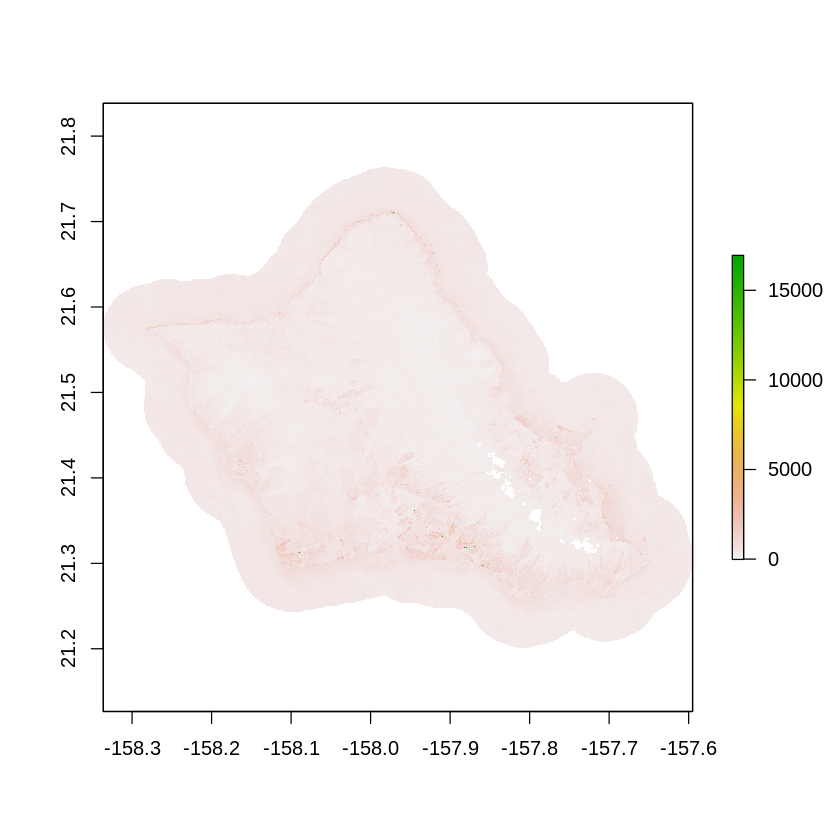

In [90]:
open_raster %>% plot

In [64]:
open_raster

class      : RasterStack 
dimensions : 2088, 2750, 5742000, 7  (nrow, ncol, ncell, nlayers)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -158.3362, -157.595, 21.20114, 21.76384  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
names      : Blue, Green, Red, NIR, SWIR1, SWIR2, elevation 


In [91]:
ncol(open_raster)
nrow(open_raster)

[1] 2750

[1] 2088

[1] 2750

[1] 2088

ERROR: ignored

In [ ]:
ncol
nrow

In [93]:
y_end

[1]  513 1025 1537 2049 2088

In [94]:
x_end

[1]  513 1025 1537 2049 2088

In [112]:
y_end <- c(seq(1, ncol(open_raster), 512), ncol(open_raster))[-1]
x_end <- c(seq(1, nrow(open_raster), 512), nrow(open_raster))[-1]

extract_grid <- expand.grid(x_end, y_end) %>% data.table

extract_grid$x_org <- extract_grid$x_end - 512
extract_grid$y_org <- extract_grid$y_end - 512

extract_grid$id <- 1:nrow(extract_grid)


In [113]:
# Calculate x_org and y_org
extract_grid$x_org <- extract_grid$Var1 - 512
extract_grid$y_org <- extract_grid$Var2 - 512


In [114]:
extract_grid

Var1,Var2,x_org,y_org,id
<dbl>,<dbl>,<dbl>,<dbl>,<int>
513,513,1,1,1
1025,513,513,1,2
1537,513,1025,1,3
2049,513,1537,1,4
2088,513,1576,1,5
513,1025,1,513,6
1025,1025,513,513,7
1537,1025,1025,513,8
2049,1025,1537,513,9


In [115]:
open_raster

class      : RasterLayer 
band       : 1  (of  7  bands)
dimensions : 2088, 2750, 5742000  (nrow, ncol, ncell)
resolution : 0.0002694946, 0.0002694946  (x, y)
extent     : -158.3362, -157.595, 21.20114, 21.76384  (xmin, xmax, ymin, ymax)
crs        : +proj=longlat +datum=WGS84 +no_defs 
source     : Oahu 
names      : Blue 


In [105]:
# Loop through the parts defined in extract_grid and export them
for (i in 1:nrow(extract_grid)) {
  # Extract the coordinates for the current part
  x_org <- extract_grid[i, "x_org"]
  x_end <- extract_grid[i, "Var1"]
  y_org <- extract_grid[i, "y_org"]
  y_end <- extract_grid[i, "Var2"]

  # Extract the part from the raster stack
  part_raster <- open_raster[x_org:x_end, y_org:y_end, ]

  # Define a filename for the exported image
  filename <- paste0("part_", i, ".tif")

  # Export the part as a GeoTIFF image
  writeRaster(part_raster, filename, format = "GTiff", overwrite = TRUE)
}


ERROR: ignored

In [104]:
result_dt <- 1:nrow(extract_grid) %>% lapply(function(x){

  nrow <- 0
  ncol <- 0
  i <- 0
  while(nrow != 512 | ncol != 512){
    i <- i + 1
    # Calculate the geographic coordinates for the cropping extent
    xmin <- xFromCol(open_raster, extract_grid[x,]$x_org) + rnorm(1) * 0.01 * 2.4
    xmax <- xFromCol(open_raster, extract_grid[x,]$x_end) + rnorm(1) * 0.01 * 2.4
    ymin <- yFromRow(open_raster, extract_grid[x,]$y_end) + rnorm(1) * 0.01 * 2.4
    ymax <- yFromRow(open_raster, extract_grid[x,]$y_org) + rnorm(1) * 0.01 * 2.4

    e <- extent(xmin, xmax, ymin, ymax)

    open_raster_cropped <- crop(open_raster, e)

    nrow <- nrow(open_raster_cropped)
    ncol <- ncol(open_raster_cropped)

    if (i > 1000) {
      return('failed to converge')
    }
  }

  # Additional processing using open_raster_cropped here

  pixel_table <- (table(values(open_raster_cropped)) / ncell(open_raster_cropped)) %>% data.table
  names(pixel_table) <- c('label', 'percent')

  out_dt <- data.table(extract_grid[x,], xmin = xmin, xmax = xmax, ymin = ymin, ymax, pixel_table)

  if (nrow(open_raster_cropped) == 512 && ncol(open_raster_cropped) == 512) {
    open_raster_cropped %>%
    writeRaster(., paste("/content/Hawaii_2005_009/Images/", extract_grid[x,]$x_org, '_', extract_grid[x,]$y_org, '.tif', sep = ''), overwrite = TRUE)

  } else {
    print('uh oh')
  }

  return(out_dt)
})


ERROR: ignored

In [68]:
# dir.create('/TrainingData/Niihau')
# Specify the path for the new folder/directory
new_folder_path <- "/content/2000/images"
dir.create(new_folder_path, showWarnings = FALSE)
if (file.exists(new_folder_path)) {
  cat("Folder created:", new_folder_path, "\n")
} else {
  cat("Failed to create folder:", new_folder_path, "\n")
}

Folder created: /content/2000/images 
